In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
N = 50
df = pd.DataFrame({'x':range(N)})
pendiente = 3
ruido = 50
ordenada = 30

In [45]:
df['y'] = df['x'].apply(lambda x: pendiente*x + ruido*np.random.random() - ruido/2 + ordenada)
df['ruido1'] = pd.Series(ruido * np.random.rand(N))

agregar = True
m = 45
if agregar:
    df_ruidoso = df.copy()
    for i in range(m):
        df_ruidoso['ruido'+ str(i)] = pd.Series(ruido * np.random.rand(N))


<AxesSubplot:xlabel='x', ylabel='y'>

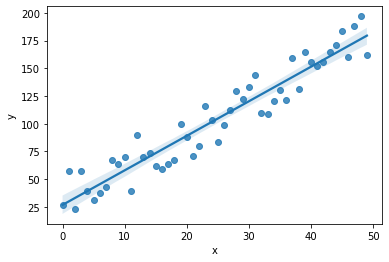

In [46]:
sns.regplot(data=df, x='x', y='y')

# Analisis con OLS sin extras

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [48]:
if agregar:
    X = df_ruidoso.drop(columns=['y'])
    y = df_ruidoso['y']
else:
    X = df.drop(columns=['y'])
    y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [49]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)

[33.23557068  4.16255138 -1.16390113 11.13199366 -3.90791628 -1.74918116
  1.51610765 -3.49323834 -0.71640575 -7.52979988  2.52014913 -1.31297489
 -9.69931967 -0.90900086  6.18230268  3.13842638 -2.82641777 -5.32578317
 -3.12298968  9.94141295 -8.03132793 -6.14556573 -2.46307732  3.28605428
  2.8811825   5.3358823  -0.34271038 -4.16477409 -5.65848117  5.36196047
  1.89215439 -1.8016323  -2.90439431  3.30221516 -3.02344962 -3.91866507
  1.03985611 -2.16495206  1.72159146 -7.90180443 -0.75069406 -1.53379957
  3.41928141  2.65893533 -2.61030053 -0.13915568]
99.21716529718056


# Ahora ridge

In [50]:
model_ridge_cv = RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

1.5
[30.1258001   3.08869719  0.31560028  9.49290952 -3.54115658 -1.12000095
  3.88524135 -3.32102373 -1.72975442 -7.92529225  3.15825754 -1.54488726
 -6.68150882 -2.93087007  2.52571379  1.19874746 -0.05161955 -3.09651313
 -0.97942665  8.75929365 -5.34428326 -4.00415935  0.20824713  3.74845481
  1.81004523  3.46061428 -0.42227057 -2.4447376  -3.9168101   3.12473582
  0.69593839 -1.70038845 -2.03024436  3.33543639 -2.50778208 -2.73804203
  0.76491642 -1.46004935  3.09761981 -6.39035917 -2.34922492 -1.99489752
  1.84876303  1.46032427 -2.99150539  1.1514204 ]
99.21716529718056


# Lasso

In [51]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

1.5
[38.80279876  1.03797696 -0.          1.17424544 -0.          0.
  0.          0.         -0.         -0.78474788  0.         -0.13931531
 -0.         -0.15702347  0.          0.78594134 -0.          0.
 -0.          2.7777343  -0.         -0.          0.          0.
  0.          0.         -0.         -1.3824613   0.          0.
  0.         -0.          0.7680876   2.19762489 -0.75362121 -0.
 -0.          0.          0.         -1.10800976 -0.         -0.
  0.         -0.         -1.45360715  0.72415491]
99.21716529718056


In [52]:
# Comparamos metricas en train y en test

print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 1.0 y en test es 0.35702667887427997


Modelo Ridge:

Score (R^2) en train del modelo es 0.995569591782102 y en test es 0.5384731070553868


Modelo Lasso:

Score (R^2) en train del modelo es 0.9462225296292472 y en test es 0.8517664325497124


